In [34]:
import matplotlib.pyplot as plt
import numpy as np
import json
import re

In [89]:
def load_data(filename, pattern=r".*", exclude=False):
    f = open(filename, 'r')
    data = json.load(f)

    print(f"=== {filename} loaded! ===")
    for key in list(data.keys()):
        if exclude and re.match(pattern, key) or (not exclude and not re.match(pattern, key)):
            del data[key]
        else:
            print(key)
    print()

    return data


def get_accuracy(net_dict, ensemble=False):
    return [v["final_accuracy" + ("_pmaj" if ensemble else "")] for v in net_dict.values()]


def get_time(net_dict):
    return [v["training_time"] for v in net_dict.values()]


def get_params(net_dict):
    return [v["n_params"] for v in net_dict.values()]

In [123]:
ensemble_data1 = load_data('ensemble_10ep_5conv_5chan.json')
ensemble_data2 = load_data('ensemble_10ep_5conv_4chan.json')

base_data1 = load_data('base_10ep_5conv.json')
base_data2 = load_data('base_10ep_6conv.json', pattern=r".*adam.*", exclude=True)

=== ensemble_10ep_5conv_5chan.json loaded! ===
ensemble_10ep_5conv_5chan_4nets.txt
ensemble_10ep_5conv_5chan_2nets.txt
ensemble_10ep_5conv_5chan_15nets.txt
ensemble_10ep_5conv_5chan_30nets.txt
ensemble_10ep_5conv_5chan_1net.txt
ensemble_10ep_5conv_5chan_3nets.txt
ensemble_10ep_5conv_5chan_5nets.txt
ensemble_10ep_5conv_5chan_25nets.txt
ensemble_10ep_5conv_5chan_10nets.txt
ensemble_10ep_5conv_5chan_20nets.txt

=== ensemble_10ep_5conv_4chan.json loaded! ===
ensemble_10ep_5conv_4chan_5nets.txt
ensemble_10ep_5conv_4chan_20nets.txt
ensemble_10ep_5conv_4chan_25nets.txt
ensemble_10ep_5conv_4chan_10nets.txt
ensemble_10ep_5conv_4chan_30nets.txt
ensemble_10ep_5conv_4chan_2nets.txt
ensemble_10ep_5conv_4chan_15nets.txt
ensemble_10ep_5conv_4chan_1net.txt
ensemble_10ep_5conv_4chan_4nets.txt
ensemble_10ep_5conv_4chan_3nets.txt

=== base_10ep_5conv.json loaded! ===
base_10ep_5conv_25chan.txt
base_10ep_5conv_5chan.txt
base_10ep_5conv_20chan.txt
base_10ep_5conv_48chan_0.2drop.txt
base_10ep_5conv_15chan.t

In [124]:
par_e1 = get_params(ensemble_data1)
acc_e1 = get_accuracy(ensemble_data1, ensemble=True)
tim_e1 = get_time(ensemble_data1)

par_e2 = get_params(ensemble_data2)
acc_e2 = get_accuracy(ensemble_data2, ensemble=True)
tim_e2 = get_time(ensemble_data2)

par_b1 = get_params(base_data1)
acc_b1 = get_accuracy(base_data1, ensemble=False)
tim_b1 = get_time(base_data1)

par_b2 = get_params(base_data2)
acc_b2 = get_accuracy(base_data2, ensemble=False)
tim_b2 = get_time(base_data2)

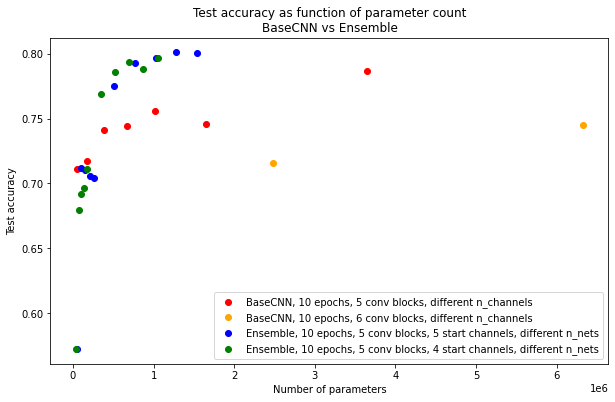

In [126]:
plt.figure(figsize=(10, 6))
plt.scatter(par_b1, acc_b1, color='red', label='BaseCNN, 10 epochs, 5 conv blocks, different n_channels')
plt.scatter(par_b2, acc_b2, color='orange', label='BaseCNN, 10 epochs, 6 conv blocks, different n_channels')
plt.scatter(par_e1, acc_e1, color='blue',
            label='Ensemble, 10 epochs, 5 conv blocks, 5 start channels, different n_nets')
plt.scatter(par_e2, acc_e2, color='green',
            label='Ensemble, 10 epochs, 5 conv blocks, 4 start channels, different n_nets')
plt.xlabel('Number of parameters')
plt.ylabel('Test accuracy')
plt.legend()
plt.title("Test accuracy as function of parameter count\nBaseCNN vs Ensemble")
plt.show()

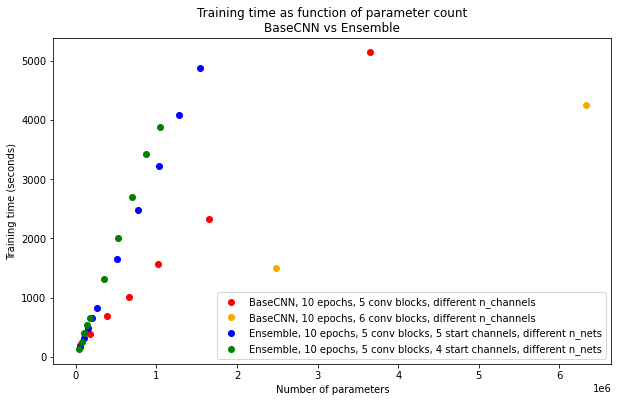

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(par_b1, tim_b1, color='red', label='BaseCNN, 10 epochs, 5 conv blocks, different n_channels')
plt.scatter(par_b2, tim_b2, color='orange', label='BaseCNN, 10 epochs, 6 conv blocks, different n_channels')
plt.scatter(par_e1, tim_e1, color='blue',
            label='Ensemble, 10 epochs, 5 conv blocks, 5 start channels, different n_nets')
plt.scatter(par_e2, tim_e2, color='green',
            label='Ensemble, 10 epochs, 5 conv blocks, 4 start channels, different n_nets')
plt.xlabel('Number of parameters')
plt.ylabel('Training time (seconds)')
plt.legend()
plt.title("Training time as function of parameter count\nBaseCNN vs Ensemble")
plt.show()

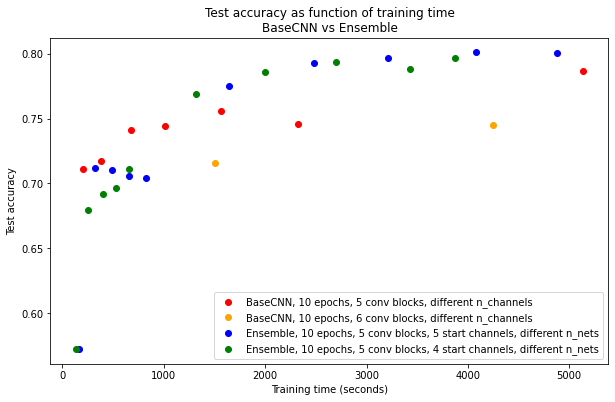

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(tim_b1, acc_b1, color='red', label='BaseCNN, 10 epochs, 5 conv blocks, different n_channels')
plt.scatter(tim_b2, acc_b2, color='orange', label='BaseCNN, 10 epochs, 6 conv blocks, different n_channels')
plt.scatter(tim_e1, acc_e1, color='blue',
            label='Ensemble, 10 epochs, 5 conv blocks, 5 start channels, different n_nets')
plt.scatter(tim_e2, acc_e2, color='green',
            label='Ensemble, 10 epochs, 5 conv blocks, 4 start channels, different n_nets')
plt.xlabel('Training time (seconds)')
plt.ylabel('Test accuracy')
plt.legend()
plt.title("Test accuracy as function of training time\nBaseCNN vs Ensemble")
plt.show()

In [ ]:
base_data1 = load_data('base_15ep_4conv_32chan_act.json')
par_b2 = get_params(base_data2)
acc_b2 = get_accuracy(base_data2, ensemble=False)
tim_b2 = get_time(base_data2)

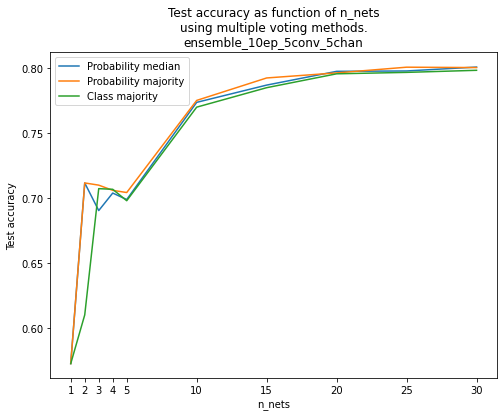

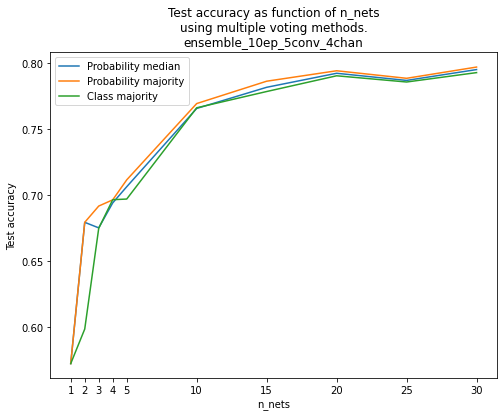

In [160]:
def voting_test(data, exp=""):
    pmed = sorted([(v['n_nets'], v['final_accuracy_pmed']) for v in data.values()])
    pmaj = sorted([(v['n_nets'], v['final_accuracy_pmaj']) for v in data.values()])
    cmaj = sorted([(v['n_nets'], v['final_accuracy_cmaj']) for v in data.values()])

    plt.figure(figsize=(8, 6))
    plt.plot([v[0] for v in pmed], [v[1] for v in pmed], label='Probability median')
    plt.plot([v[0] for v in pmaj], [v[1] for v in pmaj], label='Probability majority')
    plt.plot([v[0] for v in cmaj], [v[1] for v in cmaj], label='Class majority')
    plt.xticks([v[0] for v in pmed])
    plt.xlabel("n_nets")
    plt.ylabel("Test accuracy")
    plt.title("Test accuracy as function of n_nets\nusing multiple voting methods." + (f"\n{exp}" if exp else ""))
    plt.legend()
    plt.show()

voting_test(ensemble_data1, exp="ensemble_10ep_5conv_5chan")
voting_test(ensemble_data2, exp="ensemble_10ep_5conv_4chan")